# Decision Tree Model

In [79]:
import pandas as pd
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [80]:
df.head()

,date,UBS_x,UBS Financial Services Inc.,UBS Investment Bank,UBS Global Wealth Management,UBS Asset Management,Open,High,Low,Close,...,Dow_EMA_Move,Dow_EMA_Move_5,Dow_Disparity_Move,Dow_Disparity_s_Move,Dow_RSI_Move,target_1,target_2,target_3,target_4,target_5
0,2019-01-04,14.791667,0.0,0.0,0.0,0.0,10.734068,10.937397,10.687472,10.878093,...,1,1,1,1,0,0,1,1,1,1
1,2019-01-07,12.208333,0.0,0.0,0.0,0.0,10.878092,11.056005,10.823024,10.988229,...,1,1,1,0,0,1,1,1,1,0
2,2019-01-08,2.333333,0.0,0.0,0.0,0.0,11.047532,11.089893,10.945868,11.013644,...,1,1,0,1,0,1,1,0,0,1
3,2019-01-09,9.083333,0.0,0.0,0.0,0.0,11.081421,11.132253,10.954340,10.979756,...,1,1,0,1,0,1,0,1,1,0
4,2019-01-10,6.416667,0.0,0.0,0.0,0.0,11.030590,11.157670,11.022117,11.098366,...,1,1,1,0,0,0,1,1,1,0


# Target_1

In [81]:
# Basic Varaibles,  
df = df[["date", "Close", "Change_Close",
            "Wiki_Move", "Wiki_EMA_5", 
            "Wiki_Disparity_s_5", "Change_Google",
            "Google_MAvg_s_5", "Google_EMA_Move_5", 
            "Google_Disparity_s_Move", "Google_ROC_Move",
            "Google_RSI_Move", "Wiki_Disparity_s",
            "Stock_RSI_Move", "Google_MAvg_s_6", "Google_Move",
            "Stoch_Oscillator_14", "target_1"
            ]]
df.head()

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_1
0,2019-01-04,10.878093,0.110136,0,NaN,100.840149,550.0,1475.000000,1,0,0,0,100.840149,0,1475.00,0,NaN,0
1,2019-01-07,10.988229,0.025415,1,NaN,103.459974,6.0,1680.000000,1,1,0,0,100.000000,0,1610.50,1,NaN,1
2,2019-01-08,11.013644,-0.033888,1,NaN,103.082707,-22.0,1835.666667,1,1,0,0,101.004938,0,1765.75,1,NaN,1
3,2019-01-09,10.979756,0.118609,0,565.166667,98.755994,16.0,2013.666667,1,0,0,0,98.755994,0,1877.00,0,NaN,1
4,2019-01-10,11.098366,0.067777,0,562.277778,95.926741,-388.0,2014.500000,1,1,0,0,96.235749,0,2014.50,1,NaN,0


In [82]:
df.head()

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_1
0,2019-01-04,10.878093,0.110136,0,NaN,100.840149,550.0,1475.000000,1,0,0,0,100.840149,0,1475.00,0,NaN,0
1,2019-01-07,10.988229,0.025415,1,NaN,103.459974,6.0,1680.000000,1,1,0,0,100.000000,0,1610.50,1,NaN,1
2,2019-01-08,11.013644,-0.033888,1,NaN,103.082707,-22.0,1835.666667,1,1,0,0,101.004938,0,1765.75,1,NaN,1
3,2019-01-09,10.979756,0.118609,0,565.166667,98.755994,16.0,2013.666667,1,0,0,0,98.755994,0,1877.00,0,NaN,1
4,2019-01-10,11.098366,0.067777,0,562.277778,95.926741,-388.0,2014.500000,1,1,0,0,96.235749,0,2014.50,1,NaN,0


# Train/test split

In [83]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [84]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [85]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [86]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_1
0    289
1    358
Name: target_1, dtype: int64


# Feature scaling

In [87]:
# Scale the data (prices) from 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [88]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [89]:
corr_matrix

,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14
Change_Close,1.000000,-0.009718,-0.012581,-0.003452,-0.006789,-0.063188,0.006038,0.023984,-0.004001,-0.064745,-0.024400,0.039585,-0.073265,0.032847,0.016986
Wiki_Move,-0.009718,1.000000,0.143883,0.580469,-0.109910,-0.011054,0.220593,0.248495,0.181962,0.052446,0.534253,-0.016467,-0.010847,0.291800,0.004900
Wiki_EMA_5,-0.012581,0.143883,1.000000,0.317211,-0.170930,0.305746,0.086264,0.019370,0.038992,0.009020,0.284931,-0.061775,0.296428,0.034500,0.020886
Wiki_Disparity_s_5,-0.003452,0.580469,0.317211,1.000000,-0.208419,-0.020347,0.226263,0.181437,0.151783,0.038917,0.855821,-0.058809,-0.039450,0.271800,-0.015640
Change_Google,-0.006789,-0.109910,-0.170930,-0.208419,1.000000,-0.330364,-0.282901,-0.117409,-0.136645,-0.060137,-0.194767,0.045568,-0.280956,-0.190192,-0.001569
Google_MAvg_s_5,-0.063188,-0.011054,0.305746,-0.020347,-0.330364,1.000000,0.096574,-0.060051,-0.060809,0.015602,-0.019754,-0.007522,0.956059,-0.078726,-0.093659
Google_EMA_Move_5,0.006038,0.220593,0.086264,0.226263,-0.282901,0.096574,1.000000,0.278425,0.302042,0.048755,0.185318,-0.058177,0.055217,0.467856,-0.019753
Google_Disparity_s_Move,0.023984,0.248495,0.019370,0.181437,-0.117409,-0.060051,0.278425,1.000000,0.455061,-0.063050,0.197788,-0.056768,-0.027353,0.754965,0.005986
Google_ROC_Move,-0.004001,0.181962,0.038992,0.151783,-0.136645,-0.060809,0.302042,0.455061,1.000000,-0.024579,0.177994,0.012195,-0.069431,0.508657,0.001022
Google_RSI_Move,-0.064745,0.052446,0.009020,0.038917,-0.060137,0.015602,0.048755,-0.063050,-0.024579,1.000000,0.007696,0.016483,0.022900,-0.068758,0.002133


In [90]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

In [91]:
feature_target_corr

Change_Close               0.571618
Change_Google              0.036075
Wiki_EMA_5                 0.030145
Google_EMA_Move_5          0.006711
Google_MAvg_s_6            0.001916
Stoch_Oscillator_14       -0.004998
Stock_RSI_Move            -0.008066
Google_MAvg_s_5           -0.011844
Wiki_Disparity_s_5        -0.035272
Wiki_Move                 -0.044492
Wiki_Disparity_s          -0.051630
Google_Move               -0.053543
Google_ROC_Move           -0.056730
Google_RSI_Move           -0.070919
Google_Disparity_s_Move   -0.087331
dtype: float64

# Select features based on correlation

In [92]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Wiki_Disparity_s_5
Removed from list of features: Wiki_Move
Removed from list of features: Google_MAvg_s_6
Removed from list of features: Google_Move


In [93]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

In [94]:
X_train_tr.head()

,Change_Close,Wiki_EMA_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Stoch_Oscillator_14
0,0.622291,NaN,0.546986,0.175498,1.0,0.0,0.0,0.0,0.334803,0.0,NaN
1,0.584052,NaN,0.433109,0.298008,1.0,1.0,0.0,0.0,0.328661,0.0,NaN
2,0.557286,NaN,0.427248,0.391036,1.0,1.0,0.0,0.0,0.336008,0.0,NaN
3,0.626115,0.161776,0.435203,0.497410,1.0,0.0,0.0,0.0,0.319567,0.0,NaN
4,0.603172,0.157640,0.350632,0.497908,1.0,1.0,0.0,0.0,0.301143,0.0,NaN


### There is a problem of NaNs

In [95]:
pd.DataFrame(X_train_tr.isna().sum()).T

,Change_Close,Wiki_EMA_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Stoch_Oscillator_14
0,0,26,19,15,0,0,0,0,18,0,15


### Cheap solution for NaN --> Must come back

In [96]:
# This fixes the NaN issue that comes up later in the PCA
#X_train_tr = np.nan_to_num(X_train_tr)

X_train_tr = X_train_tr.fillna(X_train_tr.mean())
X_test_tr = X_test_tr.fillna(X_test_tr.mean())


In [97]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

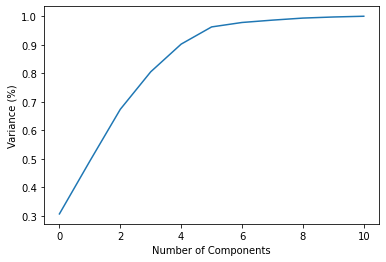

In [98]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(X_train_tr)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [99]:
pca = PCA(n_components = 5).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [100]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [101]:
model

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [102]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [103]:
from sklearn.metrics import classification_report
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.173913  0.324324  0.226415   37.000000
be long        0.731183  0.544000  0.623853  125.000000
accuracy       0.493827  0.493827  0.493827    0.493827
macro avg      0.452548  0.434162  0.425134  162.000000
weighted avg   0.603905  0.493827  0.533080  162.000000



### Tree diagram

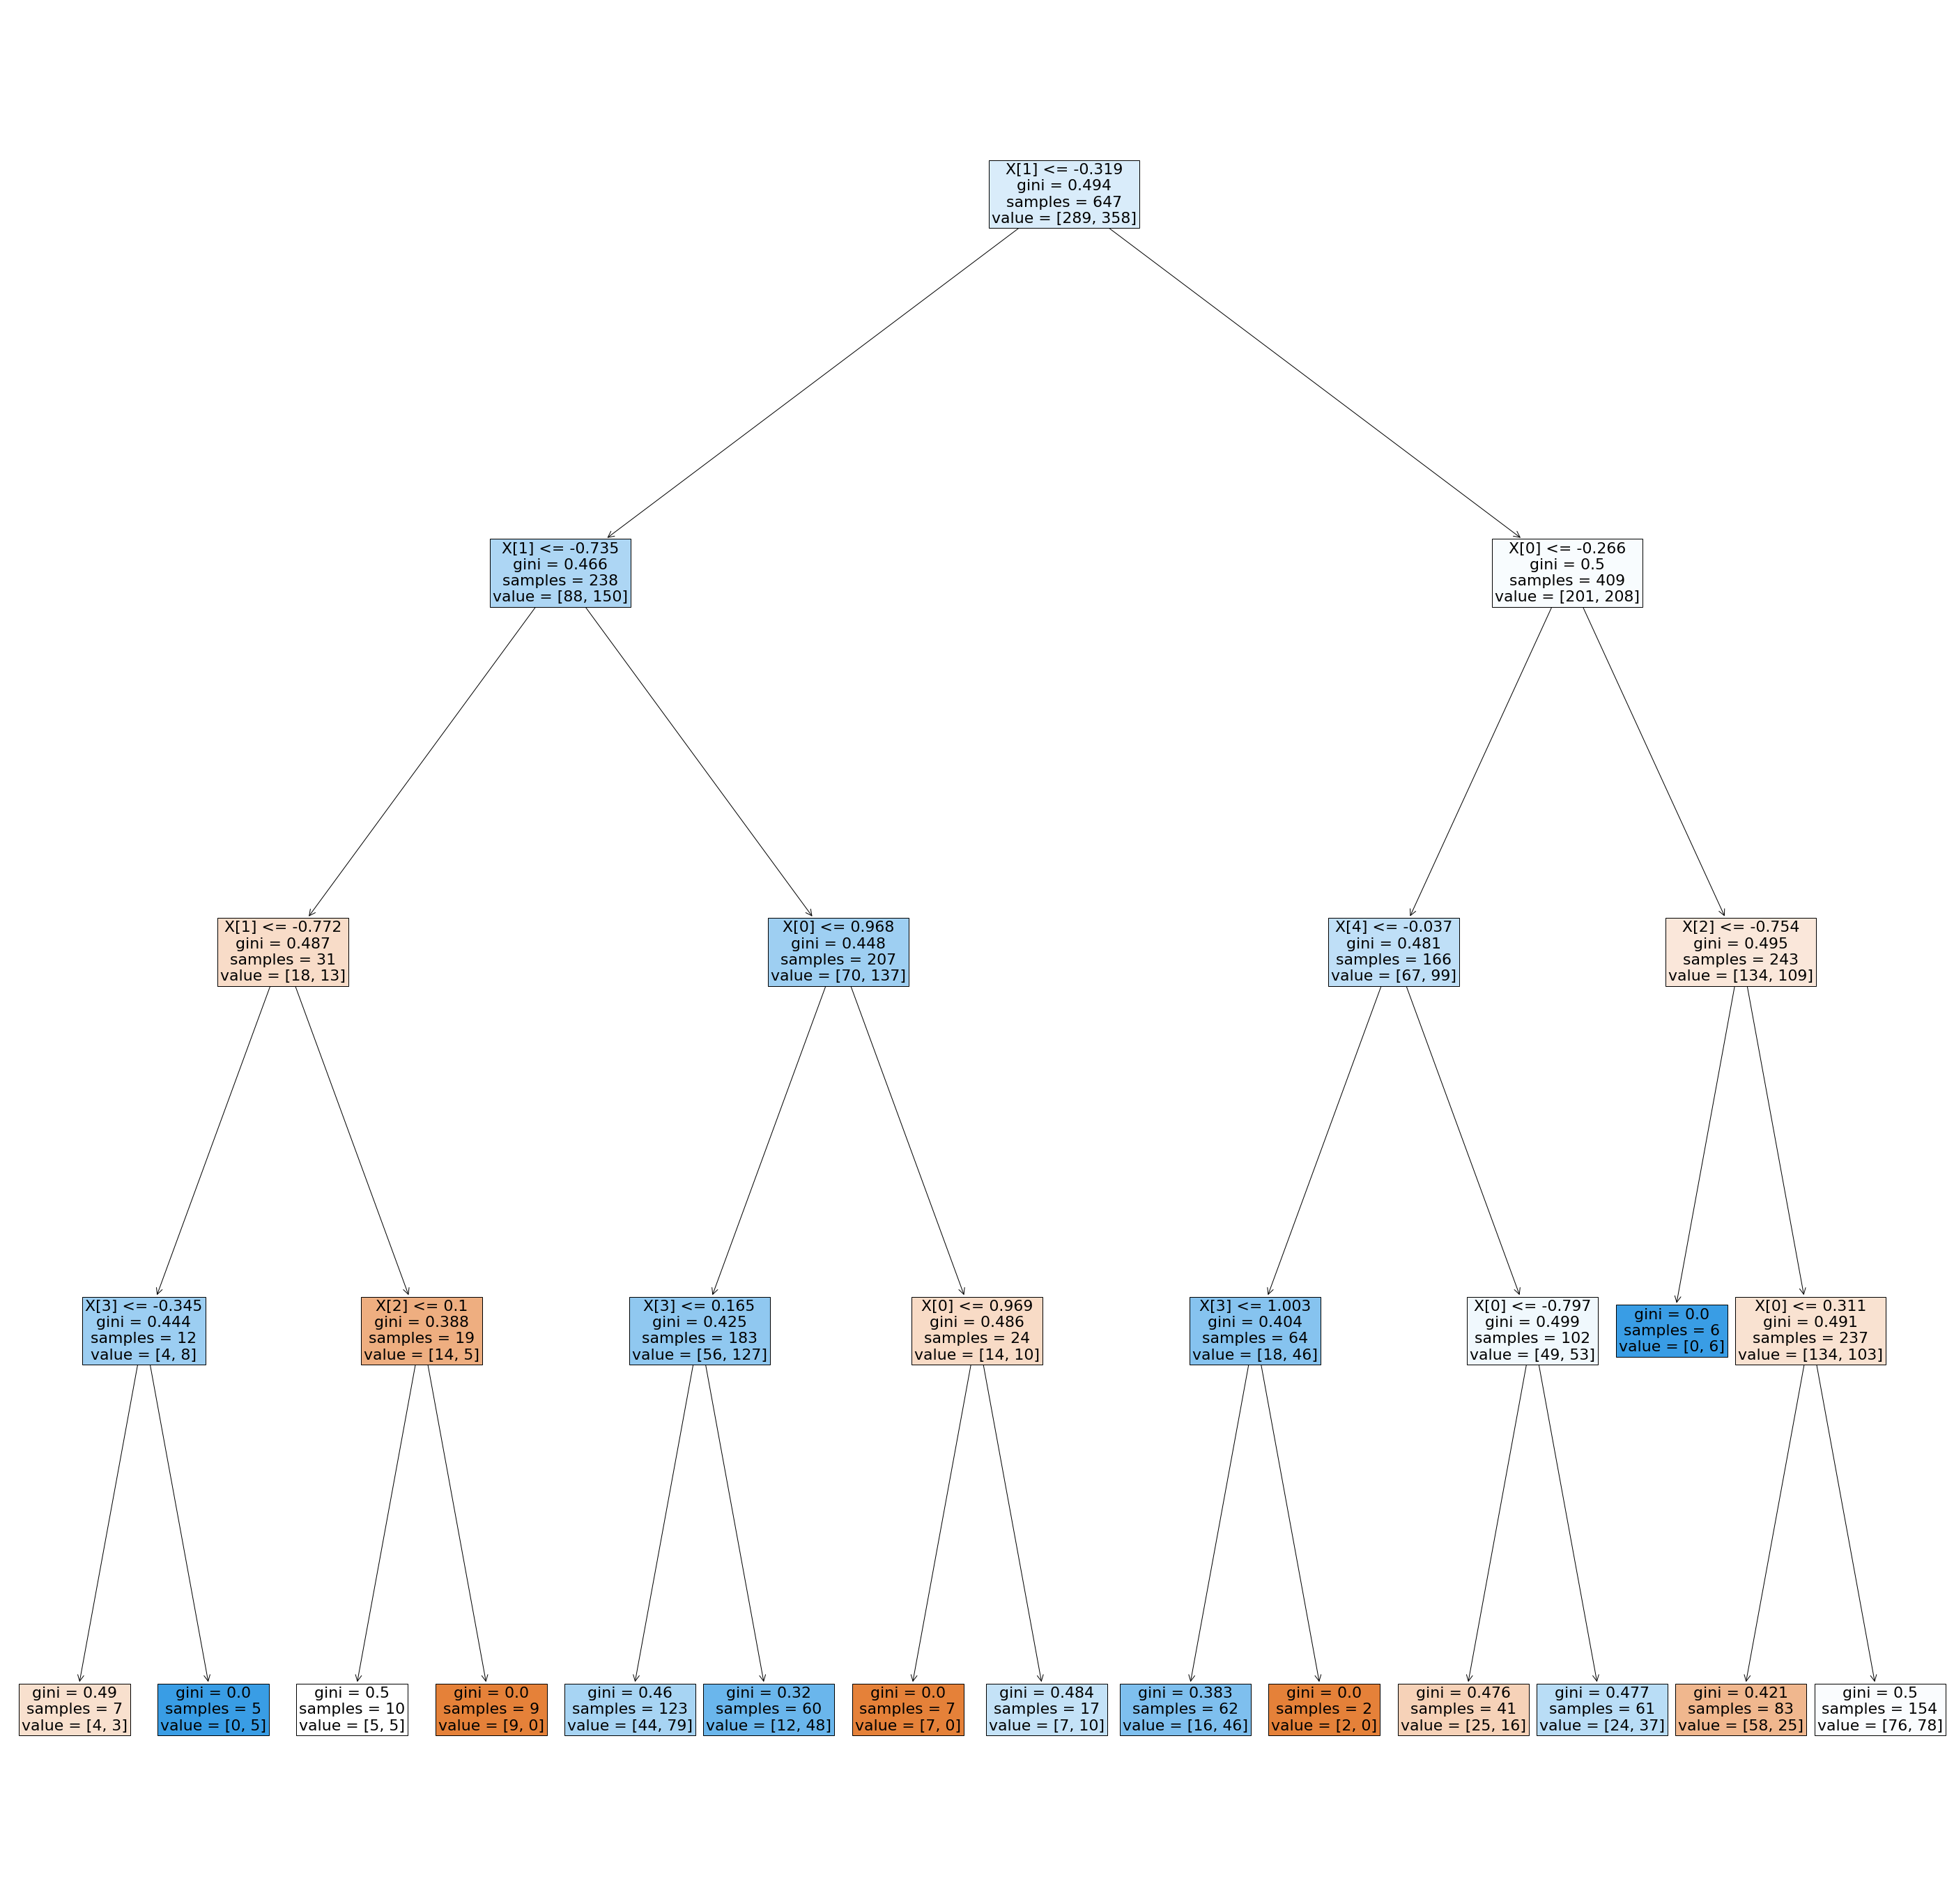

In [104]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [106]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      64.760433  49.382716
Precision     63.319672  54.400000
Recall        86.312849  73.118280
F1 Score      73.049645  62.385321


# Target_2

In [107]:
import pandas as pd
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [108]:
# Basic Varaibles --> all the columns are the same, except for target_3
df = df[["date", "Close", "Change_Close",
            "Wiki_Move", "Wiki_EMA_5", 
            "Wiki_Disparity_s_5", "Change_Google",
            "Google_MAvg_s_5", "Google_EMA_Move_5", 
            "Google_Disparity_s_Move", "Google_ROC_Move",
            "Google_RSI_Move", "Wiki_Disparity_s",
            "Stock_RSI_Move", "Google_MAvg_s_6", "Google_Move",
            "Stoch_Oscillator_14", "target_2"
            ]]
df.head()

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_2
0,2019-01-04,10.878093,0.110136,0,NaN,100.840149,550.0,1475.000000,1,0,0,0,100.840149,0,1475.00,0,NaN,1
1,2019-01-07,10.988229,0.025415,1,NaN,103.459974,6.0,1680.000000,1,1,0,0,100.000000,0,1610.50,1,NaN,1
2,2019-01-08,11.013644,-0.033888,1,NaN,103.082707,-22.0,1835.666667,1,1,0,0,101.004938,0,1765.75,1,NaN,1
3,2019-01-09,10.979756,0.118609,0,565.166667,98.755994,16.0,2013.666667,1,0,0,0,98.755994,0,1877.00,0,NaN,0
4,2019-01-10,11.098366,0.067777,0,562.277778,95.926741,-388.0,2014.500000,1,1,0,0,96.235749,0,2014.50,1,NaN,1


# Train/test split

In [109]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [110]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [111]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [112]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_2
0    299
1    348
Name: target_2, dtype: int64


# Feature scaling

In [113]:
# Scale the data (prices) from 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [114]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [115]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

# Select features based on correlation

In [116]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Wiki_Move
Removed from list of features: Wiki_Disparity_s
Removed from list of features: Google_MAvg_s_5
Removed from list of features: Google_Disparity_s_Move
Removed from list of features: Google_ROC_Move


In [117]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

### There is a problem of NaNs

In [118]:
pd.DataFrame(X_train_tr.isna().sum()).T

,Change_Close,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_EMA_Move_5,Google_RSI_Move,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14
0,0,26,18,19,0,0,0,15,0,15


### Cheap solution for NaN --> Must come back

In [119]:
# This fixes the NaN issue that comes up later in the PCA
#X_train_tr = np.nan_to_num(X_train_tr)

X_train_tr = X_train_tr.fillna(X_train_tr.mean())
X_test_tr = X_test_tr.fillna(X_test_tr.mean())


In [120]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

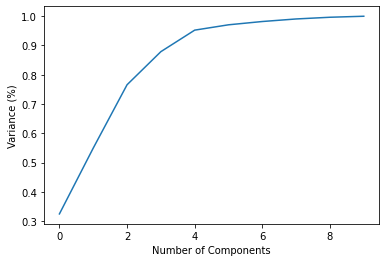

In [121]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(X_train_tr)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [122]:
pca = PCA(n_components = 5).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [123]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [124]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [125]:
from sklearn.metrics import classification_report
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.112676  0.470588  0.181818   17.000000
be long        0.901099  0.565517  0.694915  145.000000
accuracy       0.555556  0.555556  0.555556    0.555556
macro avg      0.506887  0.518053  0.438367  162.000000
weighted avg   0.818363  0.555556  0.641072  162.000000



### Tree diagram

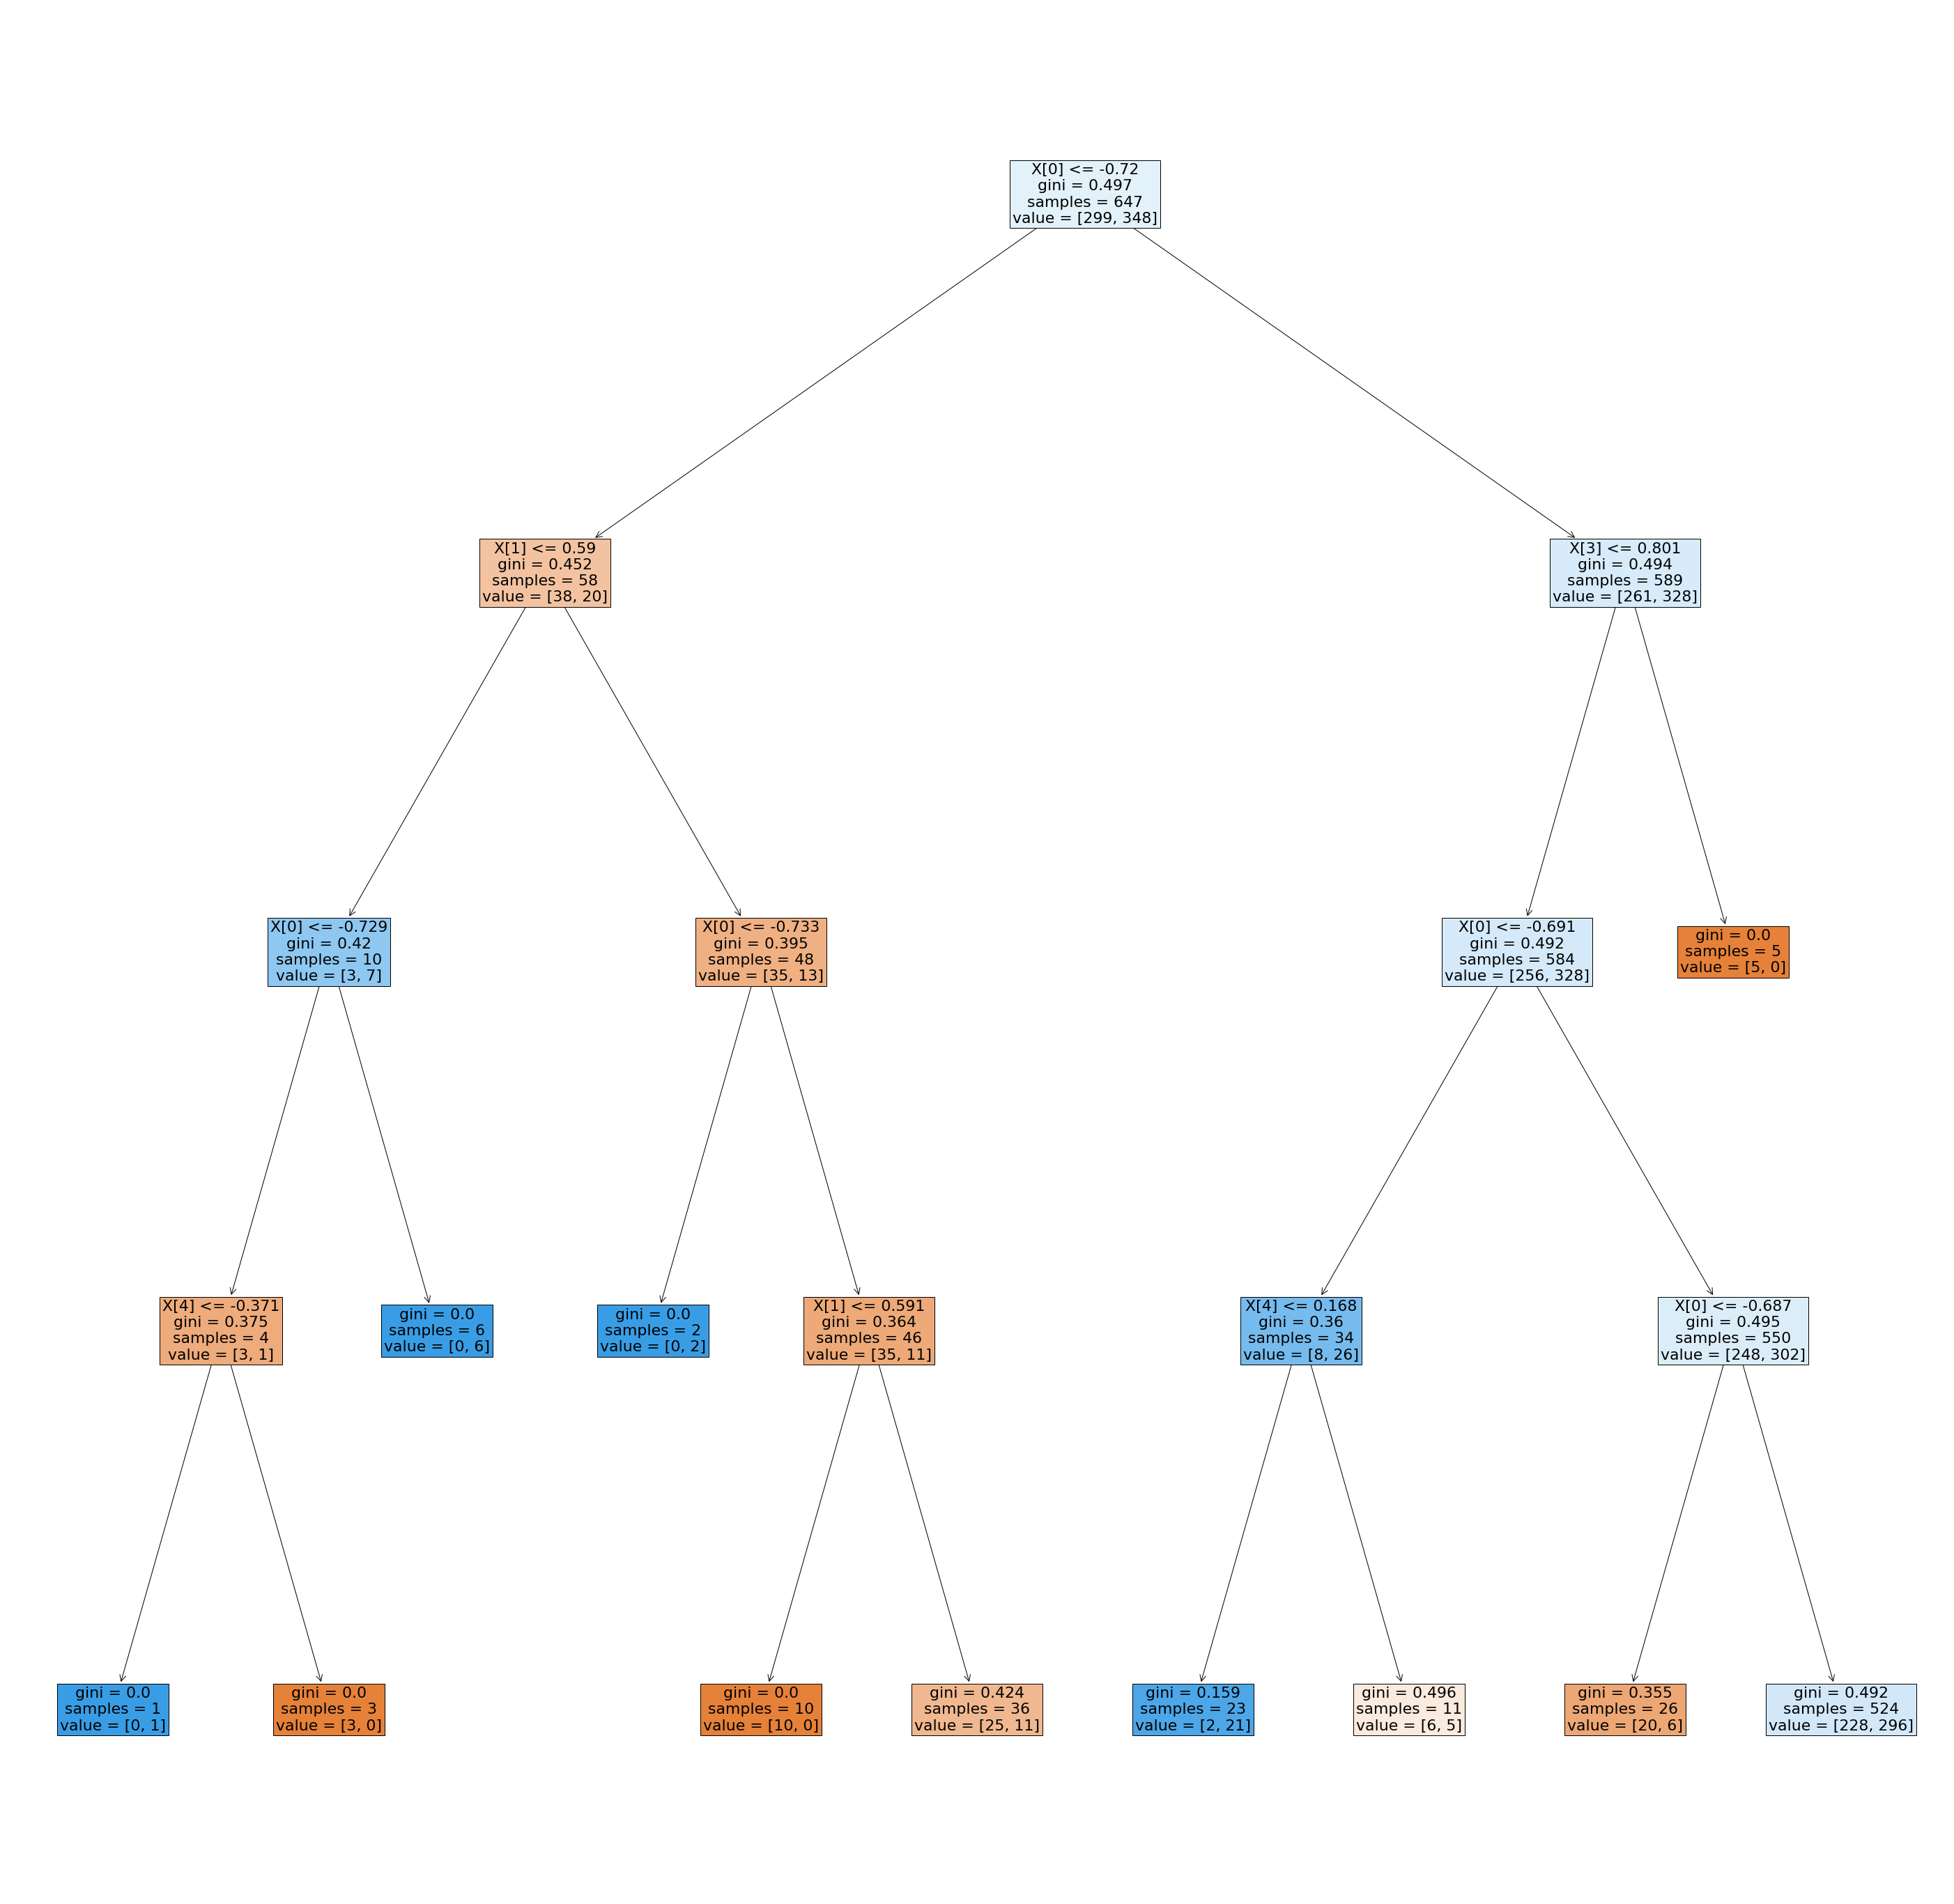

In [126]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [128]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      61.051005  55.555556
Precision     58.633094  56.551724
Recall        93.678161  90.109890
F1 Score      72.123894  69.491525


# Target_3

In [129]:
import pandas as pd
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [130]:
# Basic Varaibles --> all the columns are the same, except for target_3
df = df[["date", "Close", "Change_Close",
            "Wiki_Move", "Wiki_EMA_5", 
            "Wiki_Disparity_s_5", "Change_Google",
            "Google_MAvg_s_5", "Google_EMA_Move_5", 
            "Google_Disparity_s_Move", "Google_ROC_Move",
            "Google_RSI_Move", "Wiki_Disparity_s",
            "Stock_RSI_Move", "Google_MAvg_s_6", "Google_Move",
            "Stoch_Oscillator_14", "target_3"
            ]]
df.head()

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_3
0,2019-01-04,10.878093,0.110136,0,NaN,100.840149,550.0,1475.000000,1,0,0,0,100.840149,0,1475.00,0,NaN,1
1,2019-01-07,10.988229,0.025415,1,NaN,103.459974,6.0,1680.000000,1,1,0,0,100.000000,0,1610.50,1,NaN,1
2,2019-01-08,11.013644,-0.033888,1,NaN,103.082707,-22.0,1835.666667,1,1,0,0,101.004938,0,1765.75,1,NaN,0
3,2019-01-09,10.979756,0.118609,0,565.166667,98.755994,16.0,2013.666667,1,0,0,0,98.755994,0,1877.00,0,NaN,1
4,2019-01-10,11.098366,0.067777,0,562.277778,95.926741,-388.0,2014.500000,1,1,0,0,96.235749,0,2014.50,1,NaN,1


# Train/test split

In [131]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [132]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [133]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [134]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_3
0    317
1    330
Name: target_3, dtype: int64


# Feature scaling

In [135]:
# Scale the data (prices) from 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [136]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [137]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

# Select features based on correlation

In [138]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Wiki_Move
Removed from list of features: Wiki_Disparity_s_5
Removed from list of features: Google_MAvg_s_5
Removed from list of features: Google_Disparity_s_Move
Removed from list of features: Google_Move


In [139]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

### There is a problem of NaNs

In [140]:
pd.DataFrame(X_train_tr.isna().sum()).T

,Change_Close,Wiki_EMA_5,Change_Google,Google_EMA_Move_5,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Stoch_Oscillator_14
0,0,26,19,0,0,0,18,0,15,15


### Cheap solution for NaN --> Must come back

In [141]:
# This fixes the NaN issue that comes up later in the PCA
#X_train_tr = np.nan_to_num(X_train_tr)

X_train_tr = X_train_tr.fillna(X_train_tr.mean())
X_test_tr = X_test_tr.fillna(X_test_tr.mean())


In [142]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

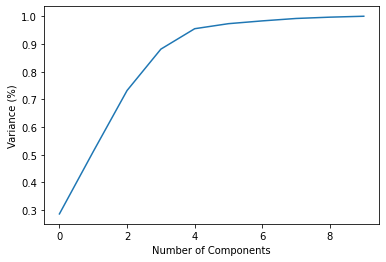

In [143]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(X_train_tr)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [144]:
pca = PCA(n_components = 5).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [145]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [146]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [147]:
from sklearn.metrics import classification_report
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.736842  0.470588  0.574359  119.000000
be long        0.267442  0.534884  0.356589   43.000000
accuracy       0.487654  0.487654  0.487654    0.487654
macro avg      0.502142  0.502736  0.465474  162.000000
weighted avg   0.612248  0.487654  0.516556  162.000000



### Tree diagram

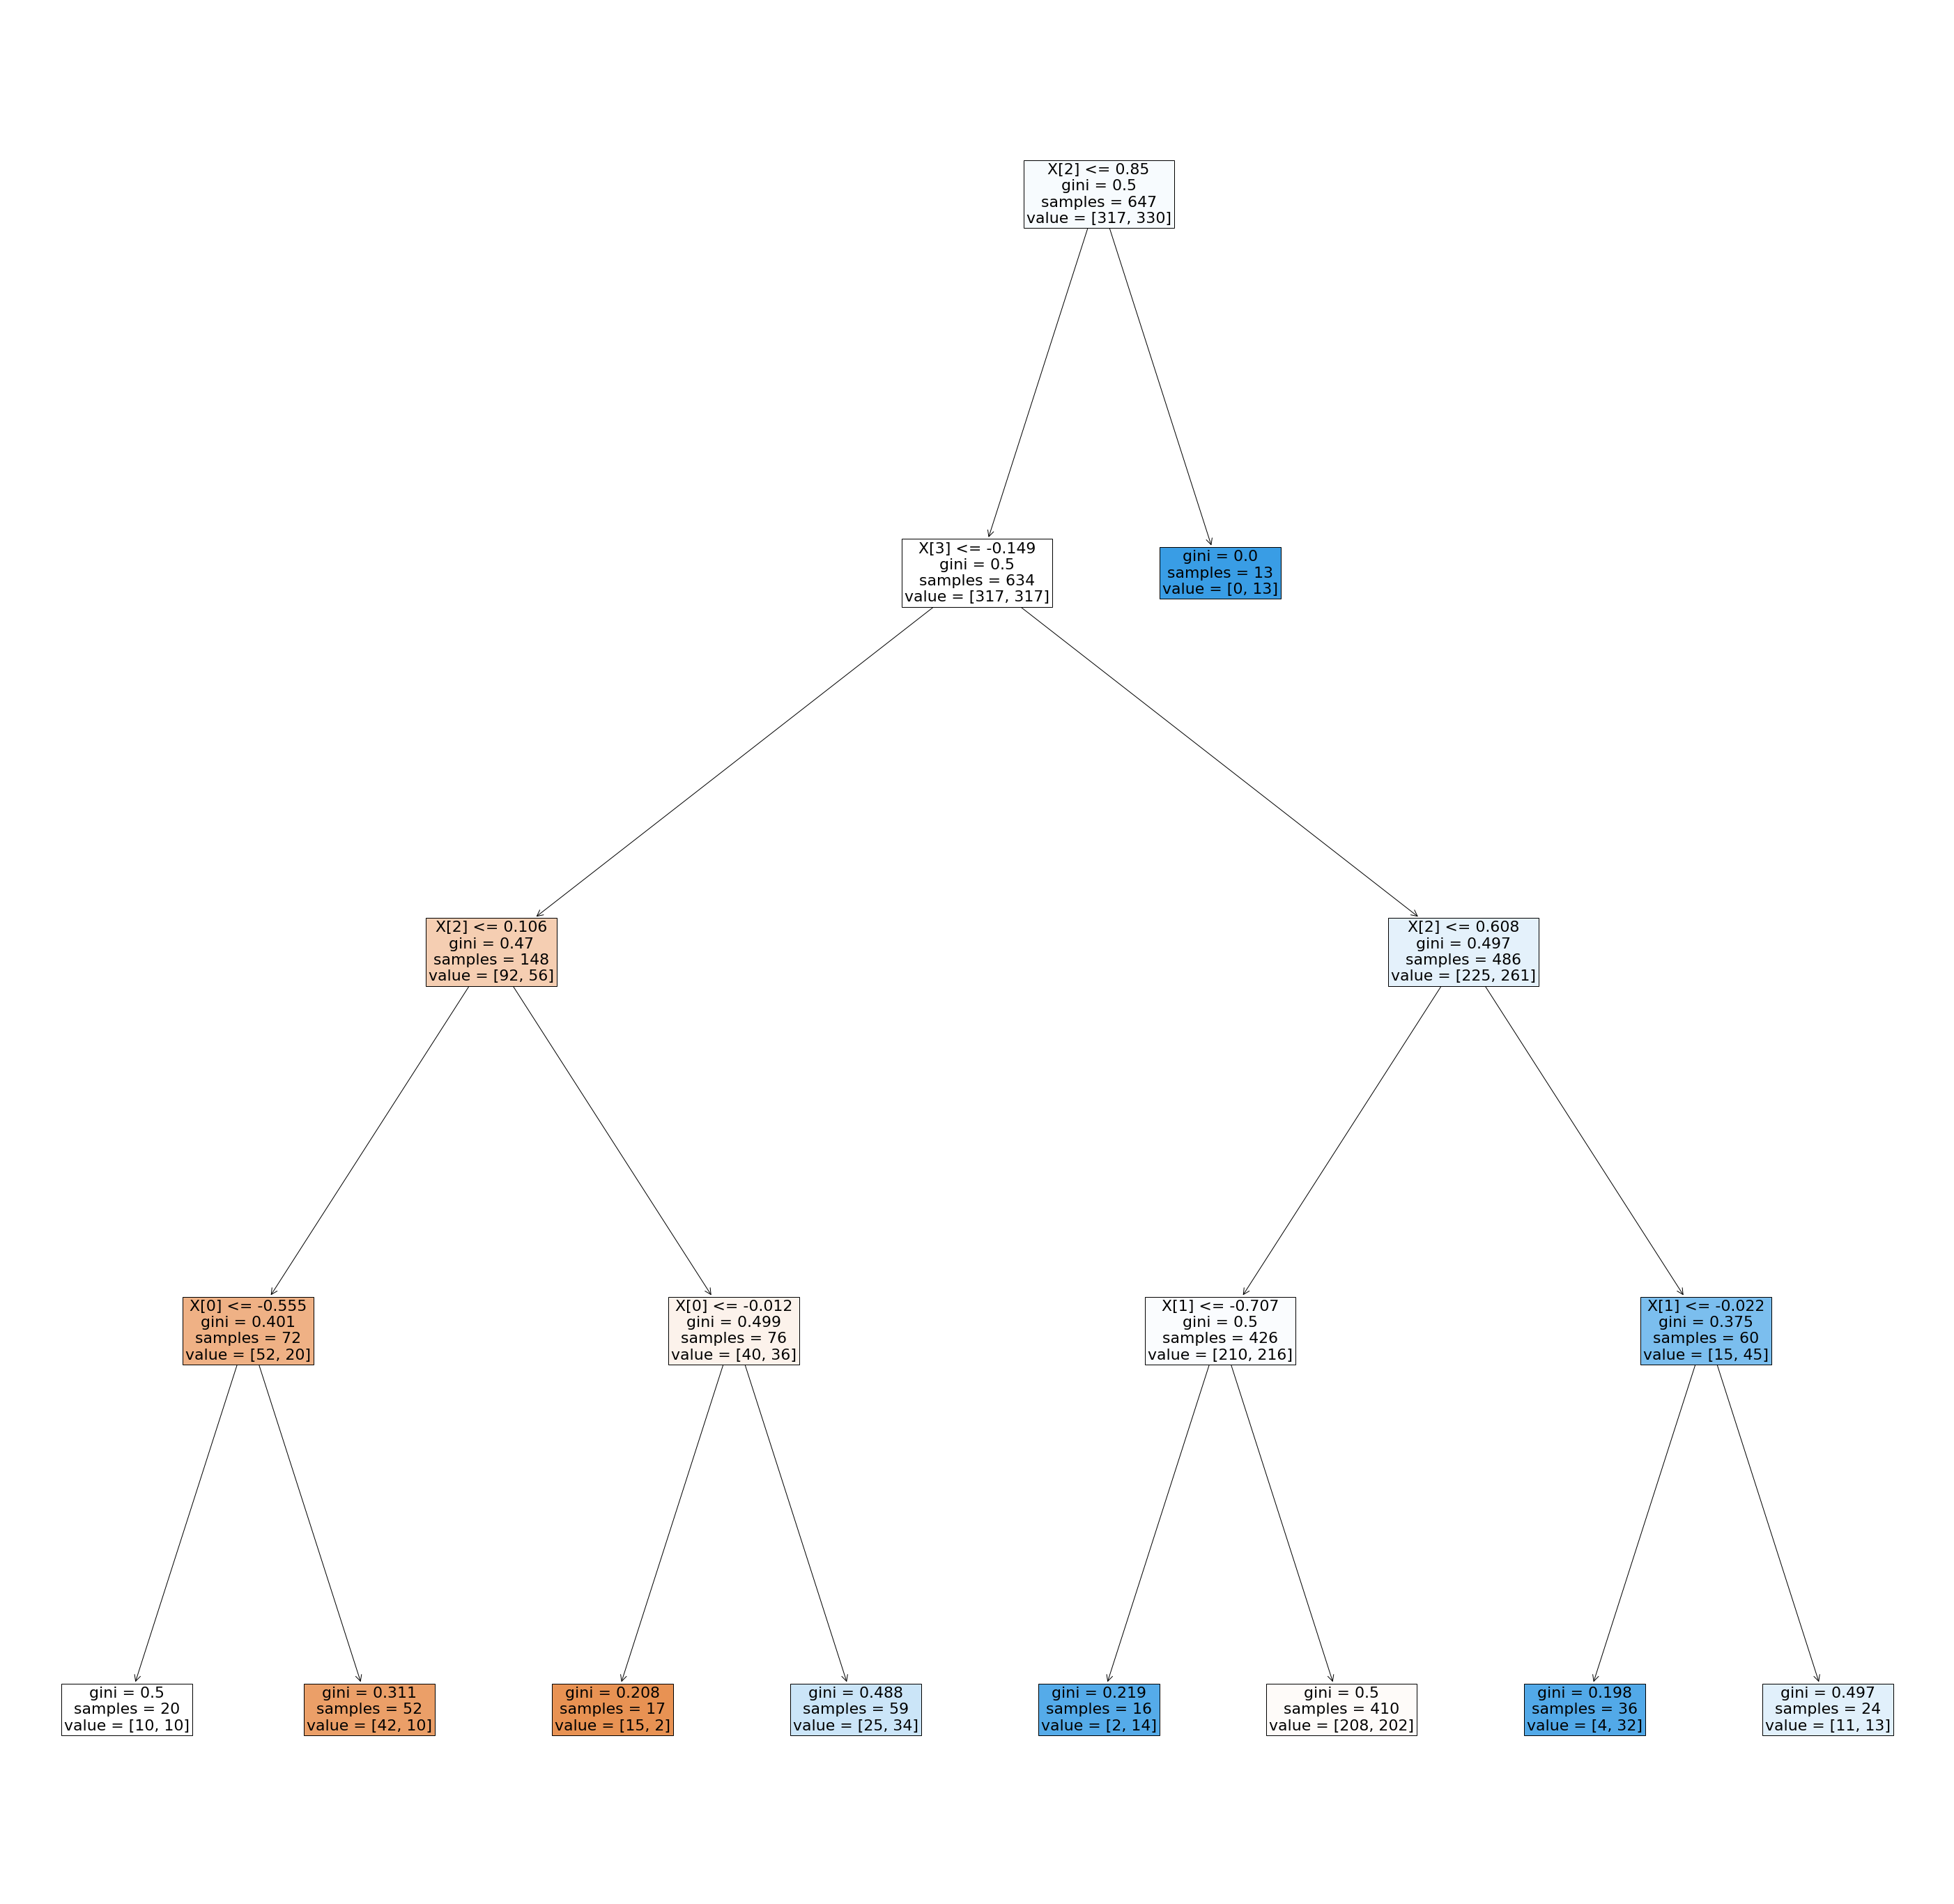

In [148]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [150]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      58.887172  48.765432
Precision     71.621622  53.488372
Recall        32.121212  26.744186
F1 Score      44.351464  35.658915


# Target_4

In [151]:
import pandas as pd
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [152]:
# Basic Varaibles --> all the columns are the same, except for target_4
df = df[["date", "Close", "Change_Close",
            "Wiki_Move", "Wiki_EMA_5", 
            "Wiki_Disparity_s_5", "Change_Google",
            "Google_MAvg_s_5", "Google_EMA_Move_5", 
            "Google_Disparity_s_Move", "Google_ROC_Move",
            "Google_RSI_Move", "Wiki_Disparity_s",
            "Stock_RSI_Move", "Google_MAvg_s_6", "Google_Move",
            "Stoch_Oscillator_14", "target_4"
            ]]
df.head()

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_4
0,2019-01-04,10.878093,0.110136,0,NaN,100.840149,550.0,1475.000000,1,0,0,0,100.840149,0,1475.00,0,NaN,1
1,2019-01-07,10.988229,0.025415,1,NaN,103.459974,6.0,1680.000000,1,1,0,0,100.000000,0,1610.50,1,NaN,1
2,2019-01-08,11.013644,-0.033888,1,NaN,103.082707,-22.0,1835.666667,1,1,0,0,101.004938,0,1765.75,1,NaN,0
3,2019-01-09,10.979756,0.118609,0,565.166667,98.755994,16.0,2013.666667,1,0,0,0,98.755994,0,1877.00,0,NaN,1
4,2019-01-10,11.098366,0.067777,0,562.277778,95.926741,-388.0,2014.500000,1,1,0,0,96.235749,0,2014.50,1,NaN,1


# Train/test split

In [153]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [154]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [155]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [156]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_4
0    302
1    345
Name: target_4, dtype: int64


# Feature scaling

In [157]:
# Scale the data (prices) from 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [158]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [159]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

# Select features based on correlation

In [160]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Wiki_Move
Removed from list of features: Wiki_Disparity_s
Removed from list of features: Google_MAvg_s_5
Removed from list of features: Google_Disparity_s_Move
Removed from list of features: Google_ROC_Move


In [161]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

### There is a problem of NaNs

In [162]:
pd.DataFrame(X_train_tr.isna().sum()).T

,Change_Close,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_EMA_Move_5,Google_RSI_Move,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14
0,0,26,18,19,0,0,0,15,0,15


### Cheap solution for NaN --> Must come back

In [163]:
# This fixes the NaN issue that comes up later in the PCA
#X_train_tr = np.nan_to_num(X_train_tr)

X_train_tr = X_train_tr.fillna(X_train_tr.mean())
X_test_tr = X_test_tr.fillna(X_test_tr.mean())


In [164]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

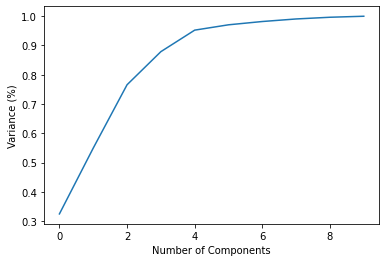

In [165]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(X_train_tr)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [166]:
pca = PCA(n_components = 5).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [167]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [168]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [169]:
from sklearn.metrics import classification_report
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score     support
be flat        0.082192  0.500000  0.141176   12.000000
be long        0.932584  0.553333  0.694561  150.000000
accuracy       0.549383  0.549383  0.549383    0.549383
macro avg      0.507388  0.526667  0.417869  162.000000
weighted avg   0.869592  0.549383  0.653569  162.000000



### Tree diagram

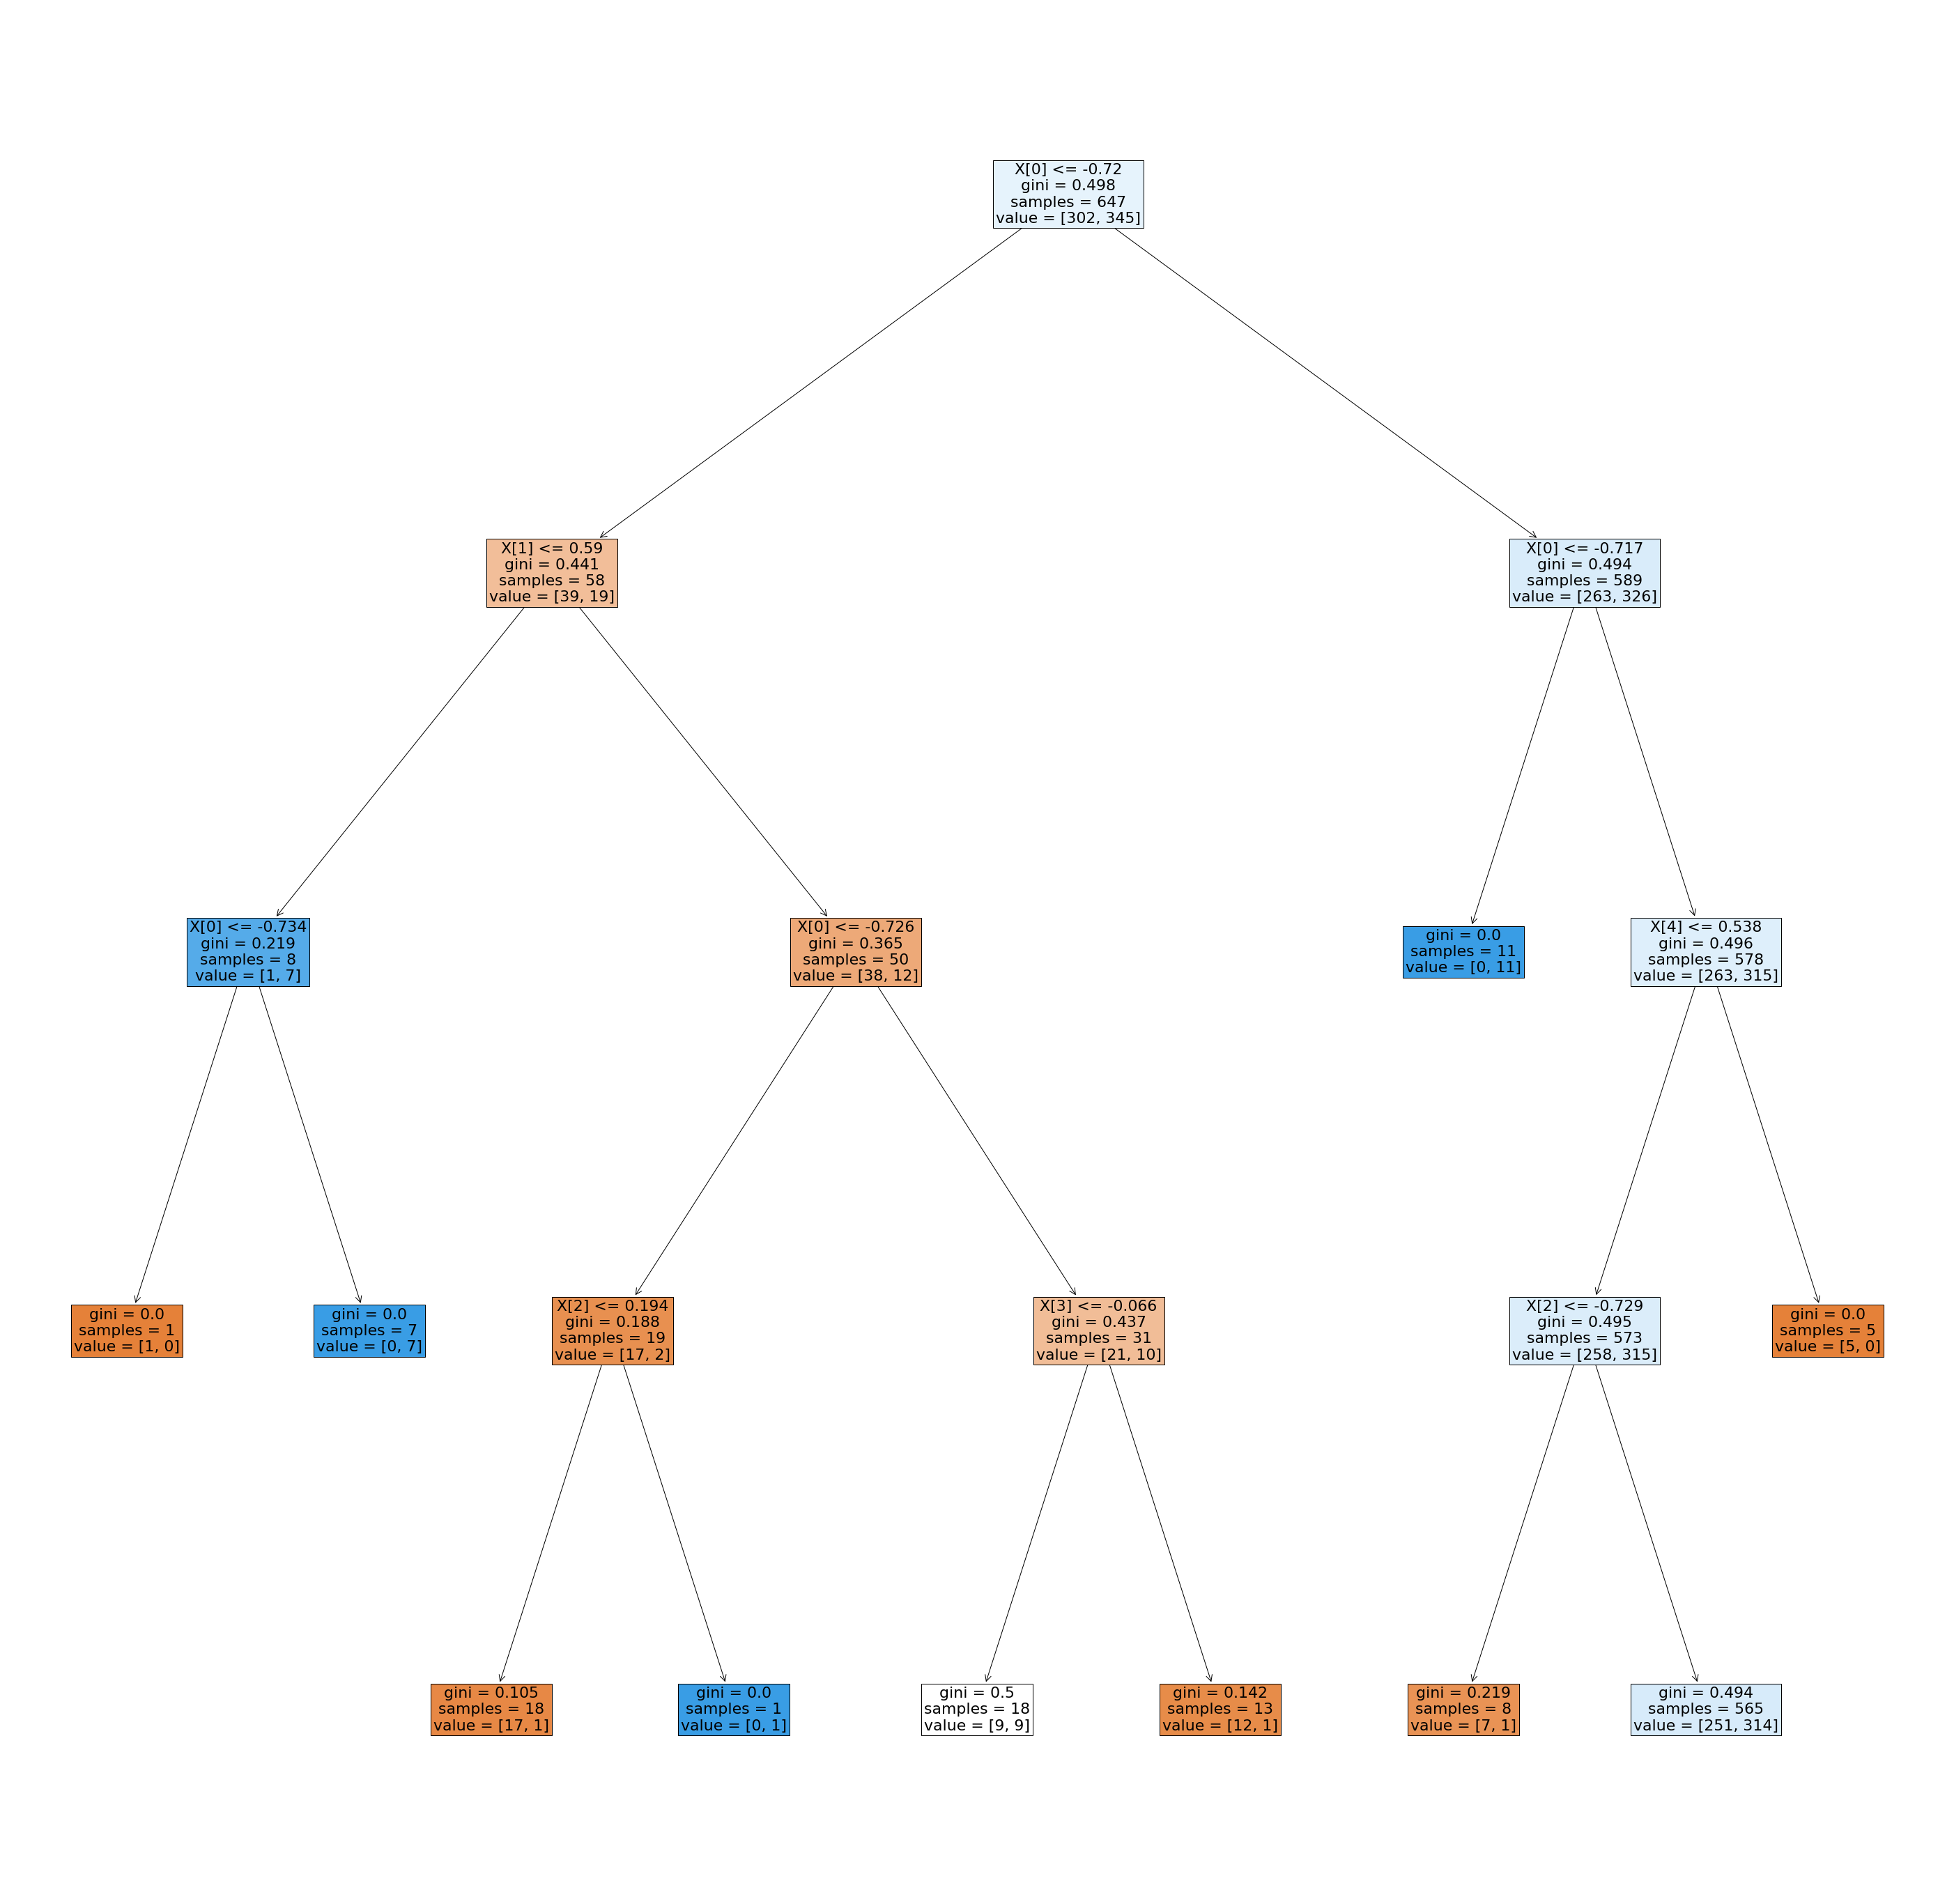

In [170]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [172]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      59.350850  54.938272
Precision     57.020548  55.333333
Recall        96.521739  93.258427
F1 Score      71.689989  69.456067


# Target_5

In [173]:
import pandas as pd
df = pd.read_csv("UBS_Cleaned_Date.csv").iloc[2:, :].reset_index(drop = True)

In [174]:
# Basic Varaibles --> all the columns are the same, except for target_5
df = df[["date", "Close", "Change_Close",
            "Wiki_Move", "Wiki_EMA_5", 
            "Wiki_Disparity_s_5", "Change_Google",
            "Google_MAvg_s_5", "Google_EMA_Move_5", 
            "Google_Disparity_s_Move", "Google_ROC_Move",
            "Google_RSI_Move", "Wiki_Disparity_s",
            "Stock_RSI_Move", "Google_MAvg_s_6", "Google_Move",
            "Stoch_Oscillator_14", "target_5"
            ]]
df.head()

,date,Close,Change_Close,Wiki_Move,Wiki_EMA_5,Wiki_Disparity_s_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_Disparity_s_Move,Google_ROC_Move,Google_RSI_Move,Wiki_Disparity_s,Stock_RSI_Move,Google_MAvg_s_6,Google_Move,Stoch_Oscillator_14,target_5
0,2019-01-04,10.878093,0.110136,0,NaN,100.840149,550.0,1475.000000,1,0,0,0,100.840149,0,1475.00,0,NaN,1
1,2019-01-07,10.988229,0.025415,1,NaN,103.459974,6.0,1680.000000,1,1,0,0,100.000000,0,1610.50,1,NaN,0
2,2019-01-08,11.013644,-0.033888,1,NaN,103.082707,-22.0,1835.666667,1,1,0,0,101.004938,0,1765.75,1,NaN,1
3,2019-01-09,10.979756,0.118609,0,565.166667,98.755994,16.0,2013.666667,1,0,0,0,98.755994,0,1877.00,0,NaN,0
4,2019-01-10,11.098366,0.067777,0,562.277778,95.926741,-388.0,2014.500000,1,1,0,0,96.235749,0,2014.50,1,NaN,0


# Train/test split

In [175]:
X = df.iloc[:, 2:-1]
Y = df.iloc[:, -1]

In [176]:
def dataset_split(X, Y, test_size):
    ind = int((1 - test_size) * len(X))
    X_train = X.iloc[:ind, :]
    X_test = X.iloc[ind:, :]
    Y_train = Y.iloc[:ind]
    Y_test = Y.iloc[ind:]
    return X_train, X_test, Y_train, Y_test, ind

In [177]:
X_train, X_test, Y_train, Y_test, split_ind = dataset_split(X, Y, test_size = 0.2)

# Analyze the balance of the classification problem<br>
i.e. the percentage of 1s and 0s in the target

In [178]:
counts = Y_train.groupby(by = Y_train).count()
counts = pd.Series(counts)
print(counts)

target_5
0    336
1    311
Name: target_5, dtype: int64


# Feature scaling

In [179]:
# Scale the data (prices) from 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [180]:
# Each feature's correlation with every other feature

corr_matrix = X_train_sc.corr()

In [181]:
#Each feature's correlation with the target variable

feature_target_corr = X_train_sc.corrwith(Y_train, method = "pearson")
feature_target_corr = feature_target_corr.sort_values(ascending = False)

# Select features based on correlation

In [182]:
all_features = X.columns.to_list()
selected_features = all_features[:]
for i in range(0, len(corr_matrix)):
    for j in range(i, len(corr_matrix)):
        # Process every pair of features
        corr = corr_matrix.iloc[i, j] 
        if abs(corr) > 0.5 and corr != 1:
            feature1 = all_features[i]
            feature2 = all_features[j]
            
            # Out of the two features in the current pair, remove the feature that
            # is less correlated with the target variable
            corr1 = feature_target_corr[feature1]
            corr2 = feature_target_corr[feature2]
            try:
                if abs(corr1) < abs(corr2):
                    selected_features.remove(feature1)
                    print("Removed from list of features:", feature1)
                else:
                    selected_features.remove(feature2)
                    print("Removed from list of features:", feature2)
            except ValueError:
                # Catch the error just in case we're trying to remove a feature
                # that's already been removed
                pass

Removed from list of features: Wiki_Disparity_s_5
Removed from list of features: Wiki_Disparity_s
Removed from list of features: Google_MAvg_s_6
Removed from list of features: Google_Disparity_s_Move
Removed from list of features: Google_ROC_Move


In [183]:
# After our function, X_train_sc, removes the least correlated fetures from X_train_sc to target_1, we proceed with the training

X_train_tr = X_train_sc[selected_features]
X_test_tr = X_test_sc[selected_features]

### There is a problem of NaNs

In [184]:
pd.DataFrame(X_train_tr.isna().sum()).T

,Change_Close,Wiki_Move,Wiki_EMA_5,Change_Google,Google_MAvg_s_5,Google_EMA_Move_5,Google_RSI_Move,Stock_RSI_Move,Google_Move,Stoch_Oscillator_14
0,0,0,26,19,15,0,0,0,0,15


### Cheap solution for NaN --> Must come back

In [185]:
# This fixes the NaN issue that comes up later in the PCA
#X_train_tr = np.nan_to_num(X_train_tr)

X_train_tr = X_train_tr.fillna(X_train_tr.mean())
X_test_tr = X_test_tr.fillna(X_test_tr.mean())


In [186]:
corr_matrix_selected_features = X_train_tr.corr()

# Plot number of components vs. explained variance for PCA algorithm

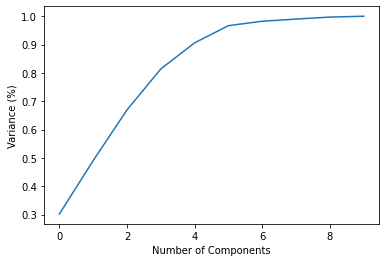

In [187]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(X_train_tr)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.show()

# Run PCA algorithm (the optimal number of components is wherever the elbow in the graph occurs)

In [188]:
pca = PCA(n_components = 5).fit(X_train_tr.to_numpy())
X_train_pca = pca.transform(X_train_tr.to_numpy())
X_test_pca = pca.transform(X_test_tr.to_numpy())

# Model =======================================================================================

In [189]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train_pca, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Make predictions

In [190]:
Y_test_pred = pd.Series(model.predict(X_test_pca)).astype(int)
Y_train_pred = pd.Series(model.predict(X_train_pca)).astype(int)

In [191]:
from sklearn.metrics import classification_report
report = classification_report(Y_test_pred, Y_test, target_names = ["be flat", "be long"], output_dict = True)
report = pd.DataFrame(report).T
print(report)
print("")

              precision    recall  f1-score    support
be flat        0.151163  0.371429  0.214876   35.00000
be long        0.710526  0.425197  0.532020  127.00000
accuracy       0.413580  0.413580  0.413580    0.41358
macro avg      0.430845  0.398313  0.373448  162.00000
weighted avg   0.589676  0.413580  0.463501  162.00000



### Tree diagram

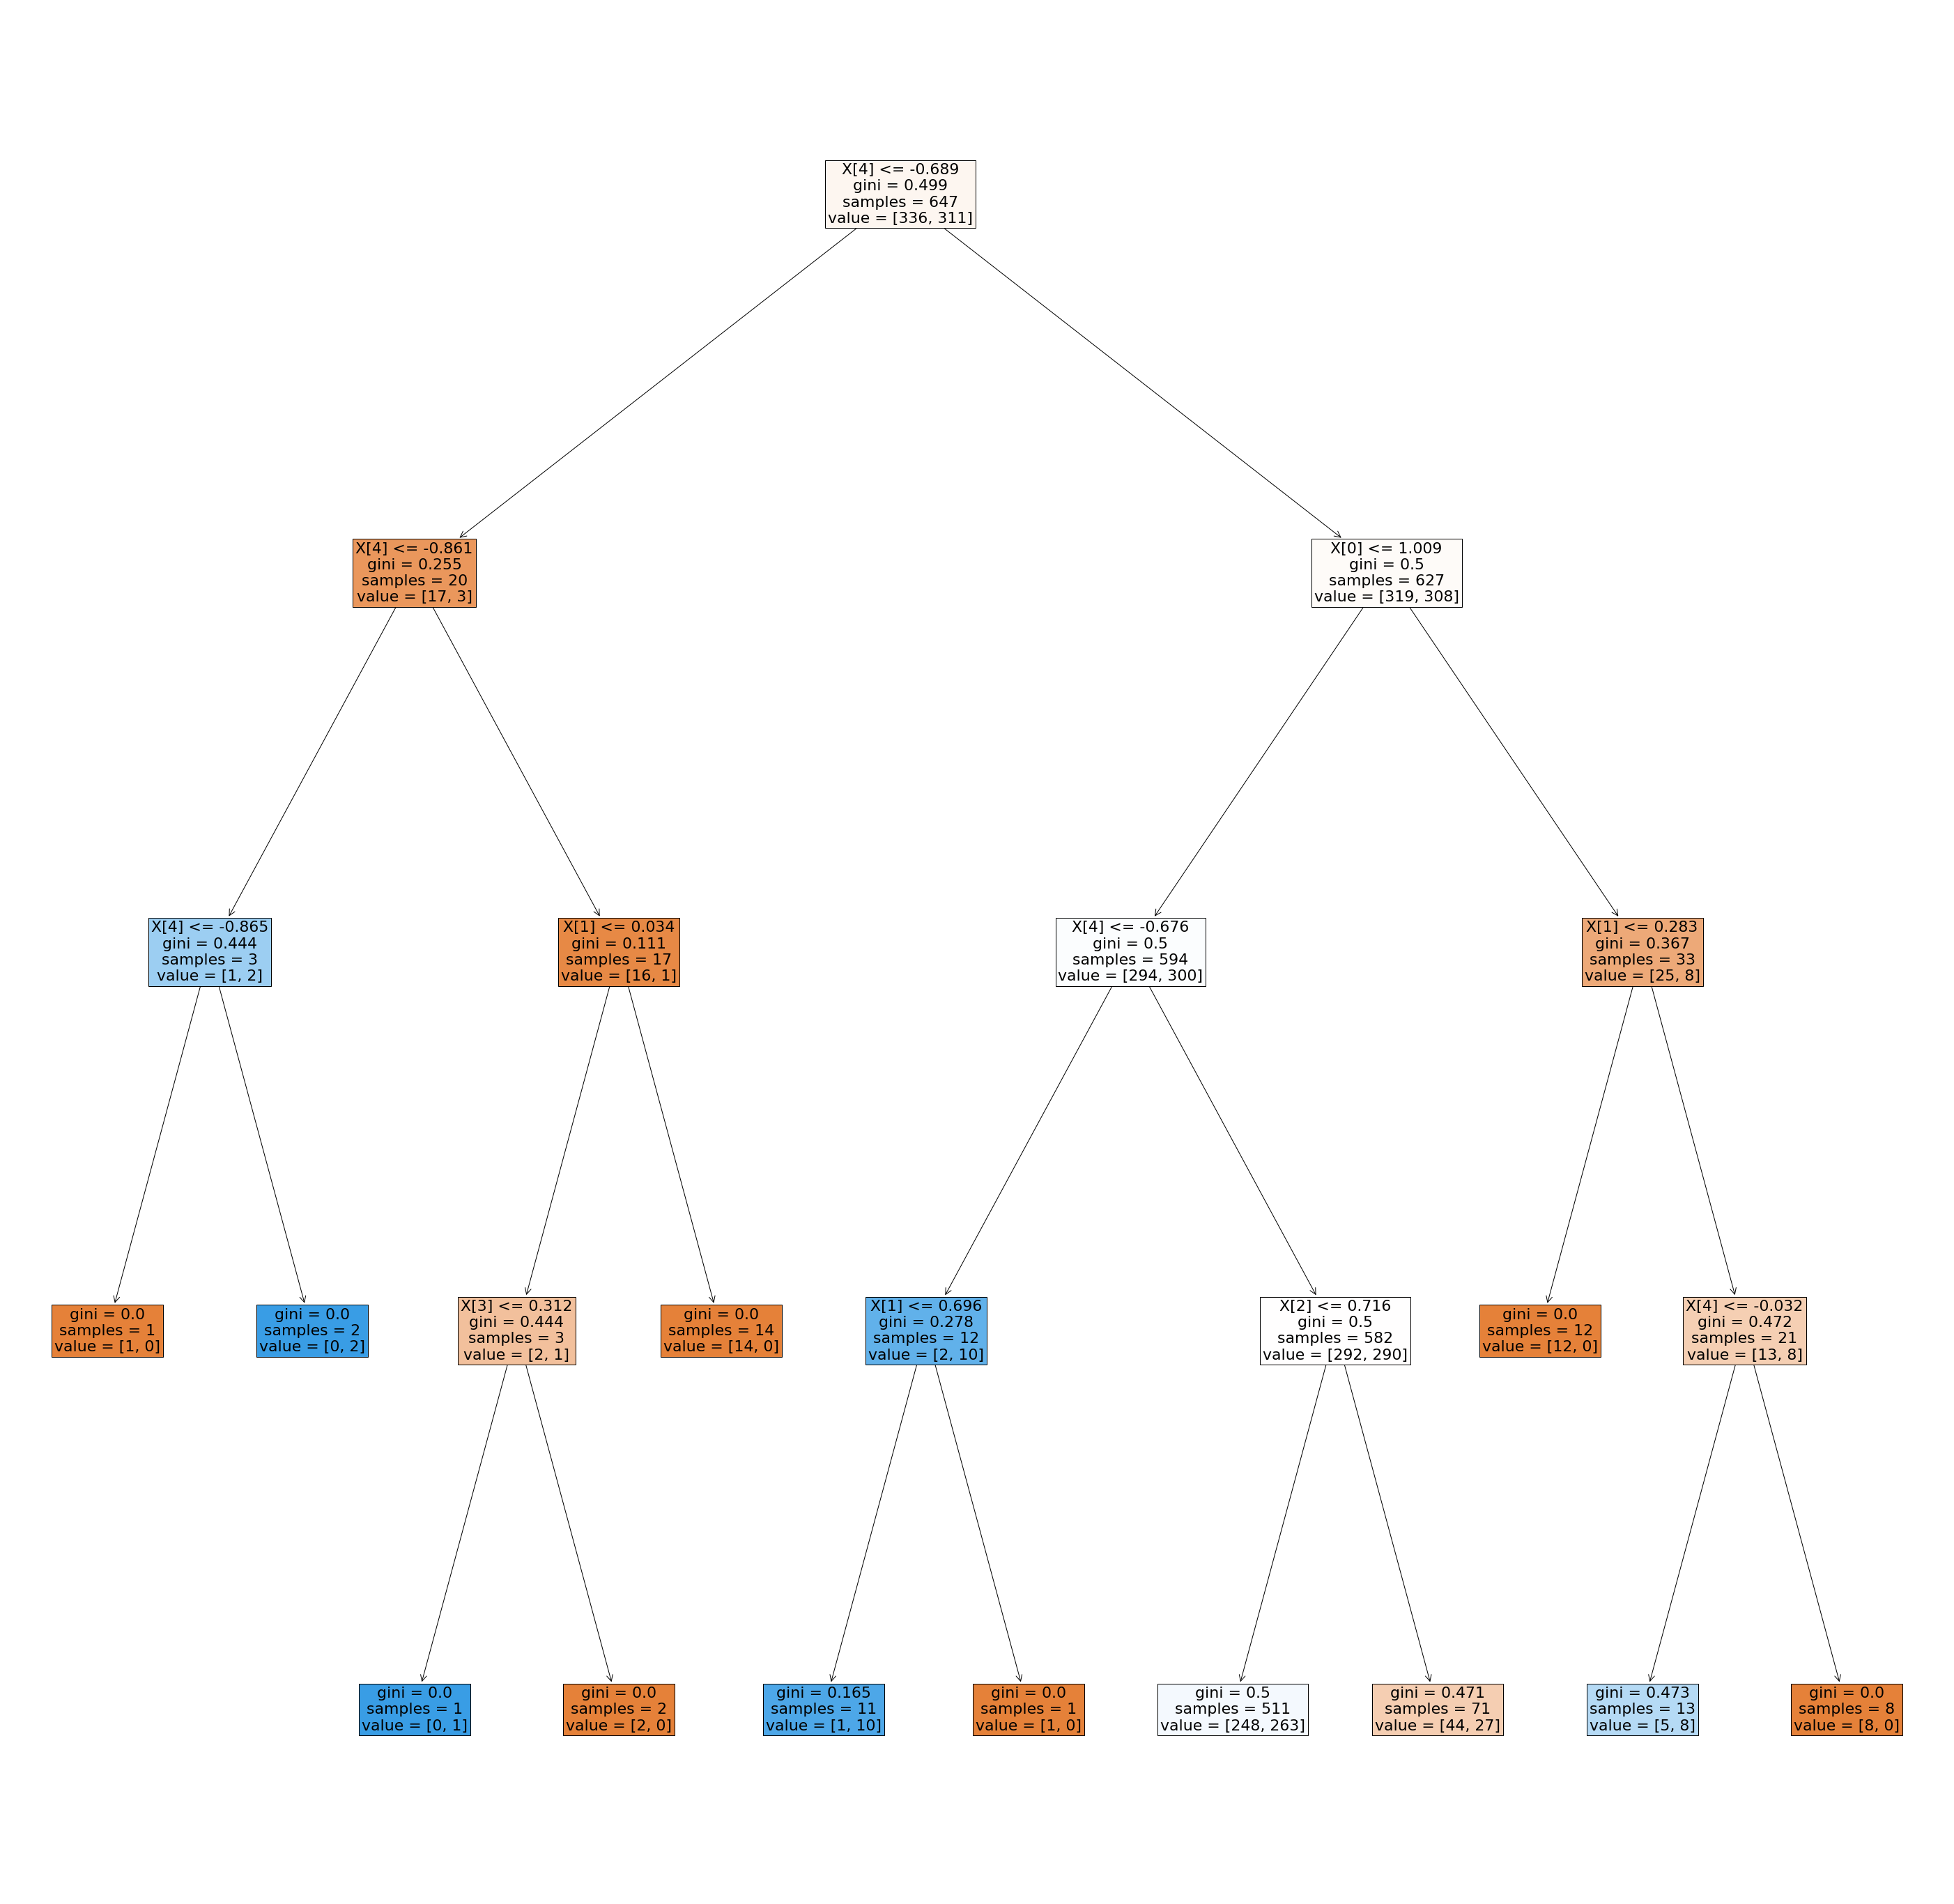

In [192]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(50,50))
plot_tree(model, ax = plt.axes(), fontsize=22, filled=True)
plt.show()

### Evaluate model and print metrics

In [193]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

metrics = \
[ \
[accuracy_score(Y_train, Y_train_pred), accuracy_score(Y_test, Y_test_pred)],
[precision_score(Y_train, Y_train_pred), precision_score(Y_test, Y_test_pred)], [recall_score(Y_train, Y_train_pred), recall_score(Y_test, Y_test_pred)],
[f1_score(Y_train, Y_train_pred), f1_score(Y_test, Y_test_pred)]
]
metrics = np.array(metrics) * 100

In [194]:
metrics = pd.DataFrame(metrics, columns = ["Training Set", "Test Set"])
metrics.insert(0, "Metric", ["Accuracy", "Precision", "Recall", "F1 Score"])
metrics.set_index("Metric", inplace = True)
print(metrics)

           Training Set   Test Set
Metric                            
Accuracy      56.568779  41.358025
Precision     52.788104  42.519685
Recall        91.318328  71.052632
F1 Score      66.902238  53.201970
